<a href="https://colab.research.google.com/github/Alvirabanu/BB-player/blob/main/BB_Player_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('nba2k-full.csv')
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/1984,6-9 / 2.06,250 lbs. / 113.4 kg.,"$37,436,858",USA,2003,1,1,NaN,NBA2k20
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,6/29/1991,6-7 / 2.01,225 lbs. / 102.1 kg.,"$32,742,000",USA,2011,1,15,San Diego State,NBA2k20
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/6/1994,6-11 / 2.11,242 lbs. / 109.8 kg.,"$25,842,697",Greece,2013,1,15,NaN,NBA2k20
3,Kevin Durant,96,#7,Brooklyn Nets,F,9/29/1988,6-10 / 2.08,230 lbs. / 104.3 kg.,"$37,199,000",USA,2007,1,2,Texas,NBA2k20
4,James Harden,96,#13,Houston Rockets,G,8/26/1989,6-5 / 1.96,220 lbs. / 99.8 kg.,"$38,199,000",USA,2009,1,3,Arizona State,NBA2k20


In [ ]:
df.shape

(464, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    464 non-null    object
 1   rating       464 non-null    int64 
 2   jersey       464 non-null    object
 3   team         441 non-null    object
 4   position     464 non-null    object
 5   b_day        464 non-null    object
 6   height       464 non-null    object
 7   weight       464 non-null    object
 8   salary       464 non-null    object
 9   country      464 non-null    object
 10  draft_year   464 non-null    int64 
 11  draft_round  464 non-null    object
 12  draft_peak   464 non-null    object
 13  college      388 non-null    object
 14  version      464 non-null    object
dtypes: int64(2), object(13)
memory usage: 54.5+ KB


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

full_name       0
rating          0
jersey          0
team           23
position        0
b_day           0
height          0
weight          0
salary          0
country         0
draft_year      0
draft_round     0
draft_peak      0
college        76
version         0
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

full_name      0
rating         0
jersey         0
team           0
position       0
b_day          0
height         0
weight         0
salary         0
country        0
draft_year     0
draft_round    0
draft_peak     0
college        0
version        0
dtype: int64

full name, birthday, height, weight, college are unnecessory column

In [ ]:
df = df.drop(['full_name', 'b_day', 'height', 'weight', 'college'], axis = 1)
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak,version
1,97,#2,Los Angeles Clippers,F,"$32,742,000",USA,2011,1,15,NBA2k20
3,96,#7,Brooklyn Nets,F,"$37,199,000",USA,2007,1,2,NBA2k20
4,96,#13,Houston Rockets,G,"$38,199,000",USA,2009,1,3,NBA2k20
5,95,#30,Golden State Warriors,G,"$40,231,758",USA,2009,1,7,NBA2k20
6,94,#3,Los Angeles Lakers,F-C,"$27,093,019",USA,2012,1,1,NBA2k20


removing #

In [ ]:
def removehash(value):
    value = value[1:]
    return int(value)

df['jersey'] = df['jersey'].apply(removehash)

In [ ]:
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak,version
1,97,2,Los Angeles Clippers,F,"$32,742,000",USA,2011,1,15,NBA2k20
3,96,7,Brooklyn Nets,F,"$37,199,000",USA,2007,1,2,NBA2k20
4,96,13,Houston Rockets,G,"$38,199,000",USA,2009,1,3,NBA2k20
5,95,30,Golden State Warriors,G,"$40,231,758",USA,2009,1,7,NBA2k20
6,94,3,Los Angeles Lakers,F-C,"$27,093,019",USA,2012,1,1,NBA2k20


In [ ]:
df['salary'] = df['salary'].str.replace('$','')
df['salary'] = df['salary'].str.replace(',','')
df.head()

<ipython-input-117-915333730f4b>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['salary'] = df['salary'].str.replace('$','')


,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak,version
1,97,2,Los Angeles Clippers,F,32742000,USA,2011,1,15,NBA2k20
3,96,7,Brooklyn Nets,F,37199000,USA,2007,1,2,NBA2k20
4,96,13,Houston Rockets,G,38199000,USA,2009,1,3,NBA2k20
5,95,30,Golden State Warriors,G,40231758,USA,2009,1,7,NBA2k20
6,94,3,Los Angeles Lakers,F-C,27093019,USA,2012,1,1,NBA2k20


In [ ]:
def removecountryoutlier(value):
    if value not in ['USA', 'Canada', 'Australia']:
        return 'Others'
    else:
        return value

df['country'] = df['country'].apply(removecountryoutlier)
df['country'].value_counts()

USA          315
Others        31
Canada        15
Australia      8
Name: country, dtype: int64

In [ ]:
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak,version
1,97,2,Los Angeles Clippers,F,32742000,USA,2011,1,15,NBA2k20
3,96,7,Brooklyn Nets,F,37199000,USA,2007,1,2,NBA2k20
4,96,13,Houston Rockets,G,38199000,USA,2009,1,3,NBA2k20
5,95,30,Golden State Warriors,G,40231758,USA,2009,1,7,NBA2k20
6,94,3,Los Angeles Lakers,F-C,27093019,USA,2012,1,1,NBA2k20


In [ ]:
df['position'].value_counts()

G      166
F      123
C       31
F-C     26
G-F     11
F-G      7
C-F      5
Name: position, dtype: int64

In [ ]:
df['draft_round'].unique

<bound method Series.unique of 1      1
3      1
4      1
5      1
6      1
      ..
457    1
458    1
459    1
460    1
462    1
Name: draft_round, Length: 369, dtype: object>

In [ ]:
df['draft_peak'].unique

<bound method Series.unique of 1      15
3       2
4       3
5       7
6       1
       ..
457    27
458    13
459     4
460     3
462    24
Name: draft_peak, Length: 369, dtype: object>

In [ ]:
def removeundrafted(value):
    if value=='Undrafted':
        return
    else:
        return value

df['draft_round'] = df['draft_round'].apply(removeundrafted)
df['draft_peak'] = df['draft_peak'].apply(removeundrafted)

In [ ]:
df.isnull().sum()

rating          0
jersey          0
team            0
position        0
salary          0
country         0
draft_year      0
draft_round    52
draft_peak     52
version         0
dtype: int64

In [ ]:
df = df.dropna()
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak,version
1,97,2,Los Angeles Clippers,F,32742000,USA,2011,1,15,NBA2k20
3,96,7,Brooklyn Nets,F,37199000,USA,2007,1,2,NBA2k20
4,96,13,Houston Rockets,G,38199000,USA,2009,1,3,NBA2k20
5,95,30,Golden State Warriors,G,40231758,USA,2009,1,7,NBA2k20
6,94,3,Los Angeles Lakers,F-C,27093019,USA,2012,1,1,NBA2k20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 1 to 462
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rating       317 non-null    int64 
 1   jersey       317 non-null    int64 
 2   team         317 non-null    object
 3   position     317 non-null    object
 4   salary       317 non-null    object
 5   country      317 non-null    object
 6   draft_year   317 non-null    int64 
 7   draft_round  317 non-null    object
 8   draft_peak   317 non-null    object
 9   version      317 non-null    object
dtypes: int64(3), object(7)
memory usage: 27.2+ KB


In [ ]:
df['salary'] = df['salary'].astype('int64')
df['draft_year'] = df['draft_year'].astype('int32')
df['draft_round'] = df['draft_round'].astype('int32')
df['draft_peak'] = df['draft_peak'].astype('int32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 1 to 462
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rating       317 non-null    int64 
 1   jersey       317 non-null    int64 
 2   team         317 non-null    object
 3   position     317 non-null    object
 4   salary       317 non-null    int64 
 5   country      317 non-null    object
 6   draft_year   317 non-null    int32 
 7   draft_round  317 non-null    int32 
 8   draft_peak   317 non-null    int32 
 9   version      317 non-null    object
dtypes: int32(3), int64(3), object(4)
memory usage: 23.5+ KB


UNIVARIATE ANALYSIS

<ipython-input-129-ccbc42519528>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['salary'])


<Axes: xlabel='salary', ylabel='Density'>

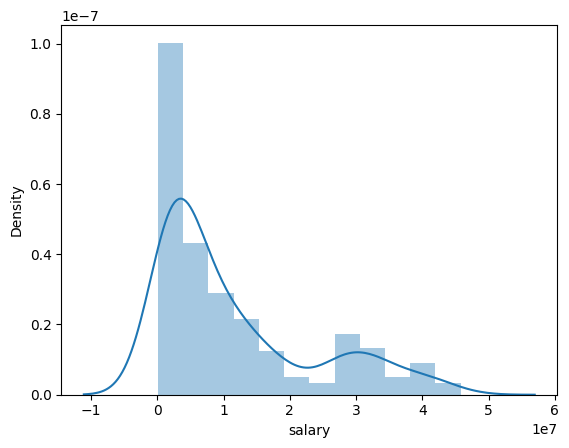

In [ ]:
import seaborn as sns
sns.distplot(df['salary'])

In [ ]:
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak,version
1,97,2,Los Angeles Clippers,F,32742000,USA,2011,1,15,NBA2k20
3,96,7,Brooklyn Nets,F,37199000,USA,2007,1,2,NBA2k20
4,96,13,Houston Rockets,G,38199000,USA,2009,1,3,NBA2k20
5,95,30,Golden State Warriors,G,40231758,USA,2009,1,7,NBA2k20
6,94,3,Los Angeles Lakers,F-C,27093019,USA,2012,1,1,NBA2k20


rating

In [ ]:
rating_counts = df['rating'].value_counts()

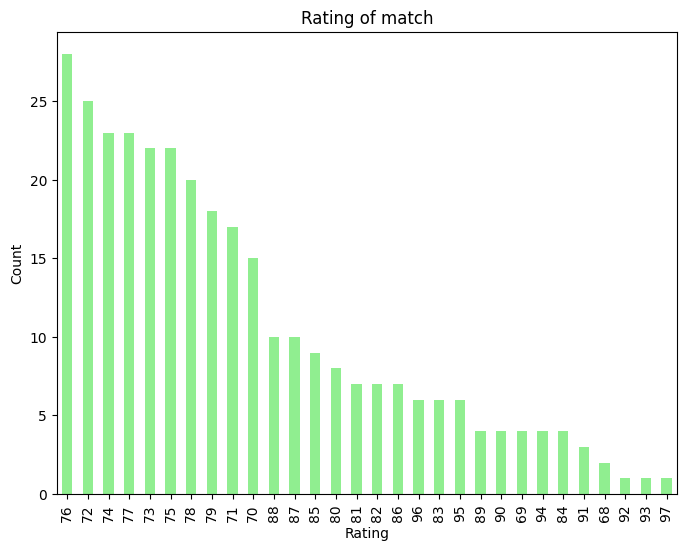

In [ ]:
plt.figure(figsize=(8, 6))
rating_counts.plot(kind='bar', color='lightgreen')
plt.title('Rating of match')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

jersey

In [ ]:
jersey_counts = df['jersey'].value_counts()

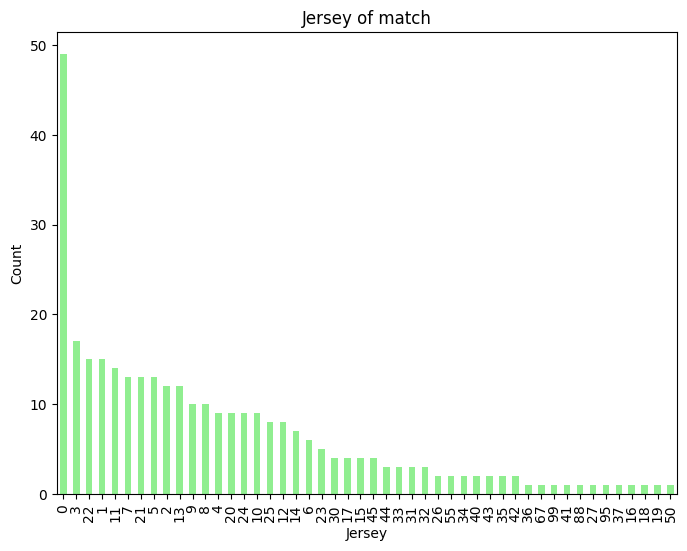

In [ ]:
plt.figure(figsize=(8, 6))
jersey_counts.plot(kind='bar', color='lightgreen')
plt.title('Jersey of match')
plt.xlabel('Jersey')
plt.ylabel('Count')
plt.show()

draft year

In [ ]:
dy_counts = df['draft_year'].value_counts()

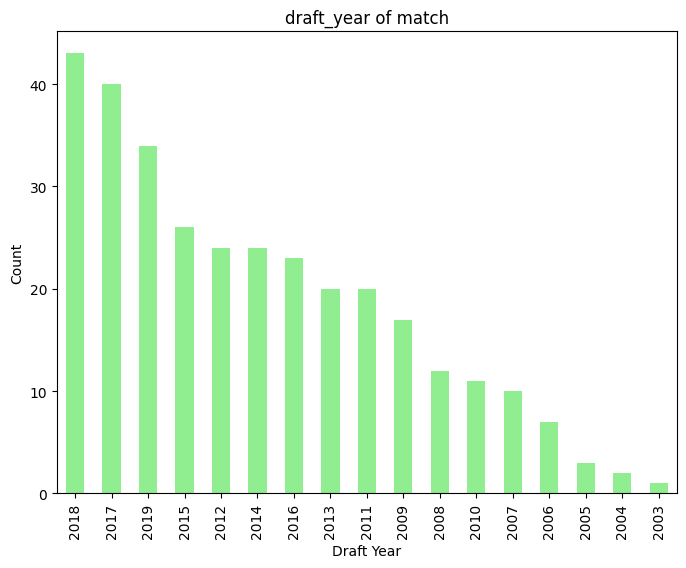

In [ ]:
plt.figure(figsize=(8, 6))
dy_counts.plot(kind='bar', color='lightgreen')
plt.title('draft_year of match')
plt.xlabel('Draft Year')
plt.ylabel('Count')
plt.show()

draft round

In [ ]:
dr_counts = df['draft_round'].value_counts()

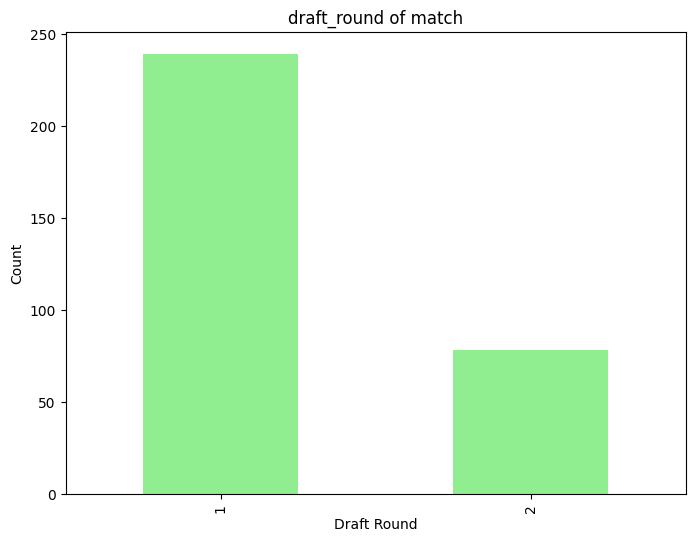

In [ ]:
plt.figure(figsize=(8, 6))
dr_counts.plot(kind='bar', color='lightgreen')
plt.title('draft_round of match')
plt.xlabel('Draft Round')
plt.ylabel('Count')
plt.show()

draft peak

In [ ]:
dp_counts = df['draft_peak'].value_counts()

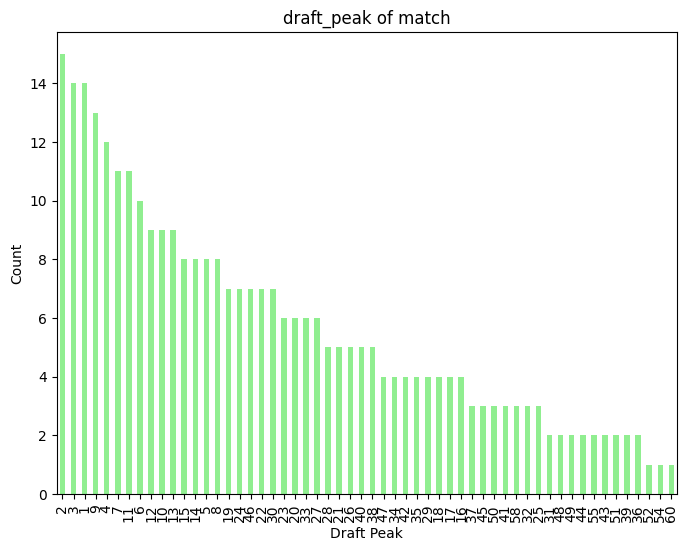

In [ ]:
plt.figure(figsize=(8, 6))
dp_counts.plot(kind='bar', color='lightgreen')
plt.title('draft_peak of match')
plt.xlabel('Draft Peak')
plt.ylabel('Count')
plt.show()

for all categorical data

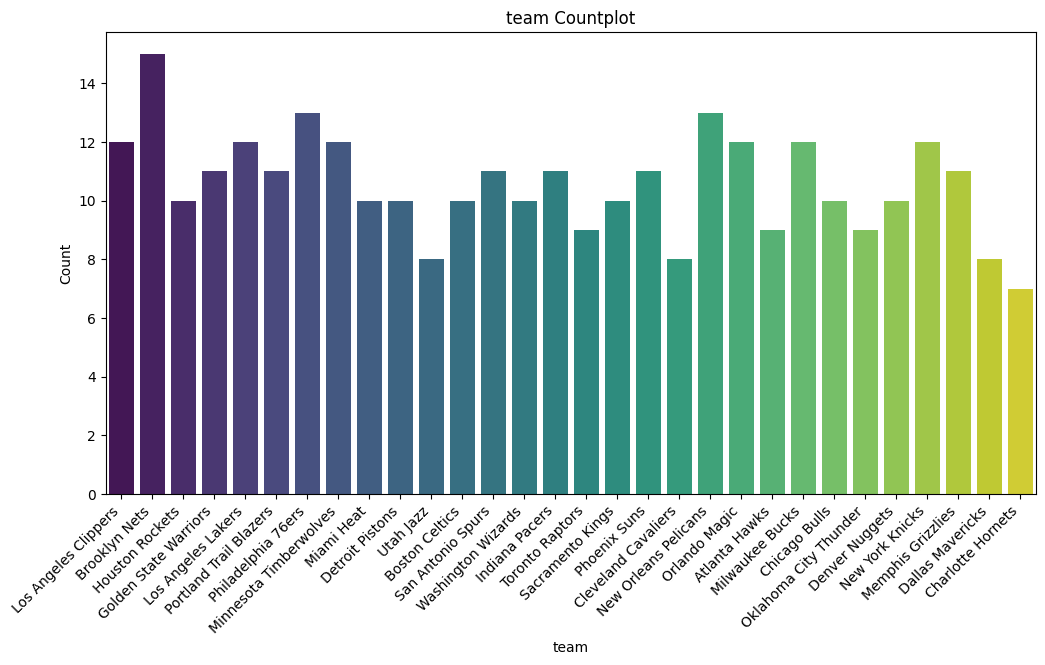

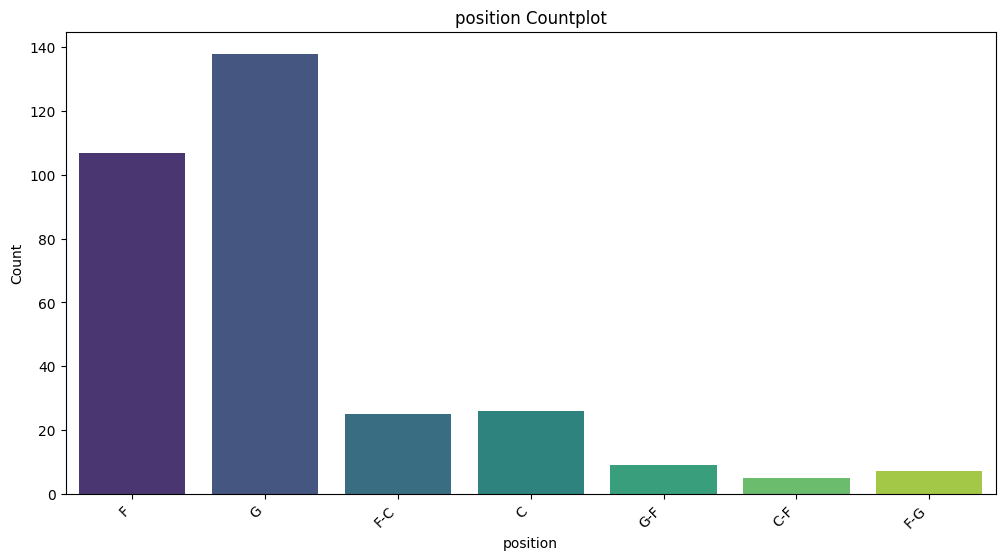

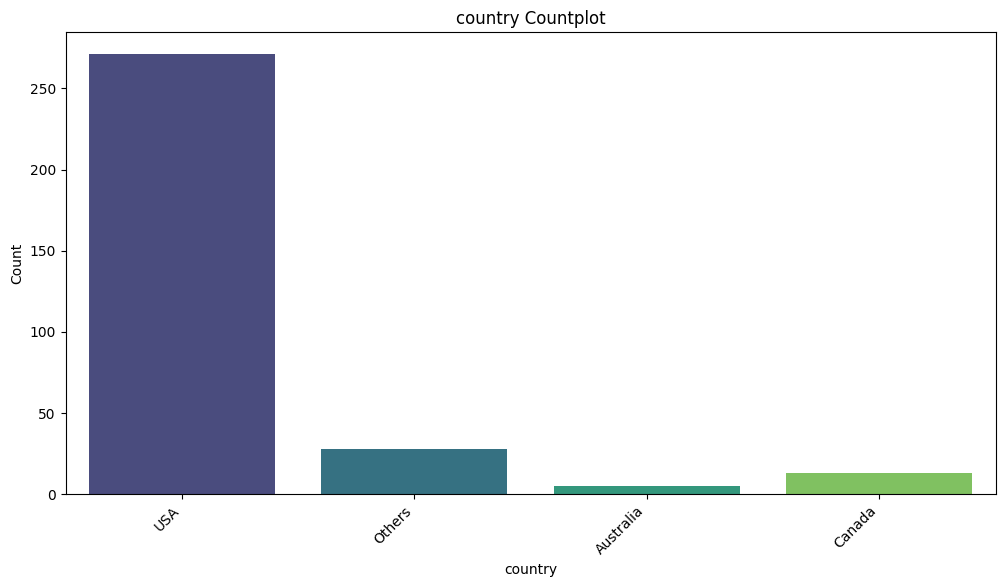

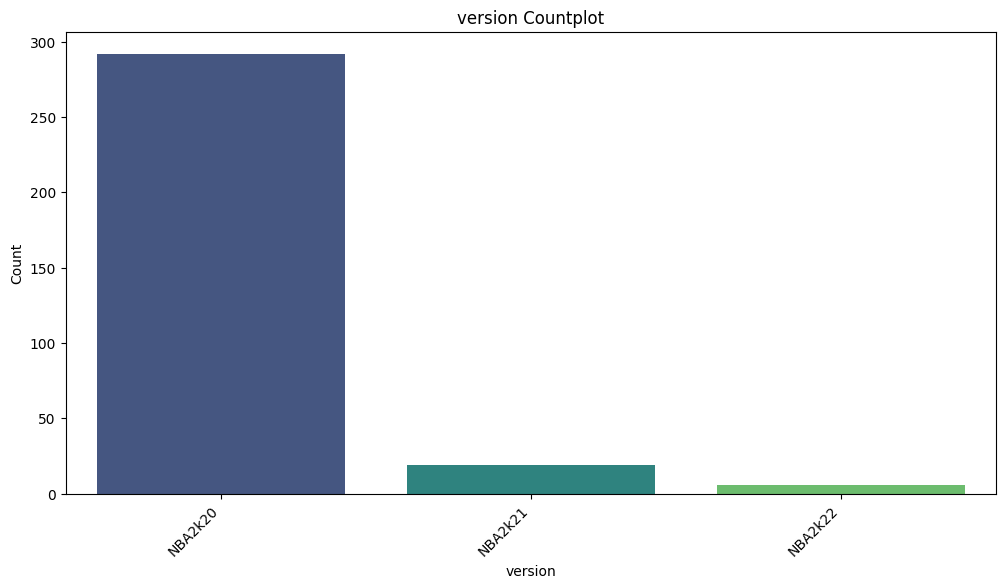

In [ ]:
categorical_columns = ['team', 'position', 'country', 'version']
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=df[col], palette='viridis')
    plt.title(f'{col} Countplot')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

BIVARIATE ANALYSIS

for numeric values with salary

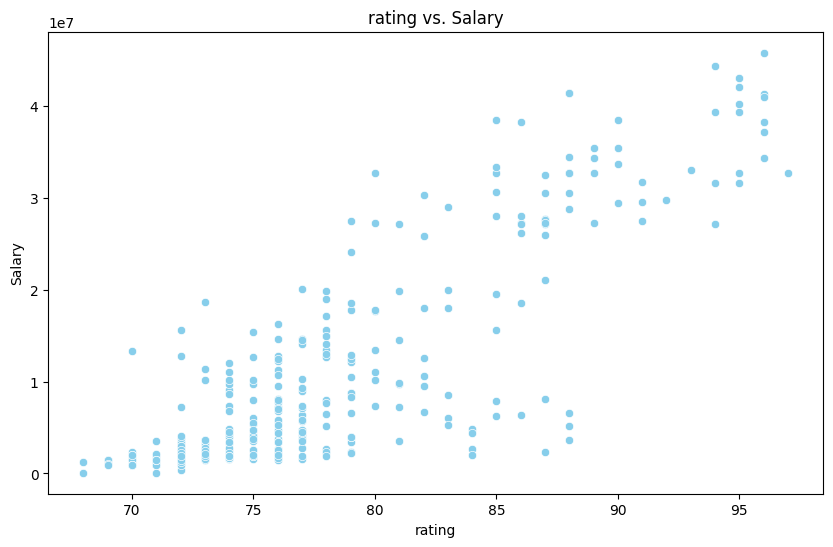

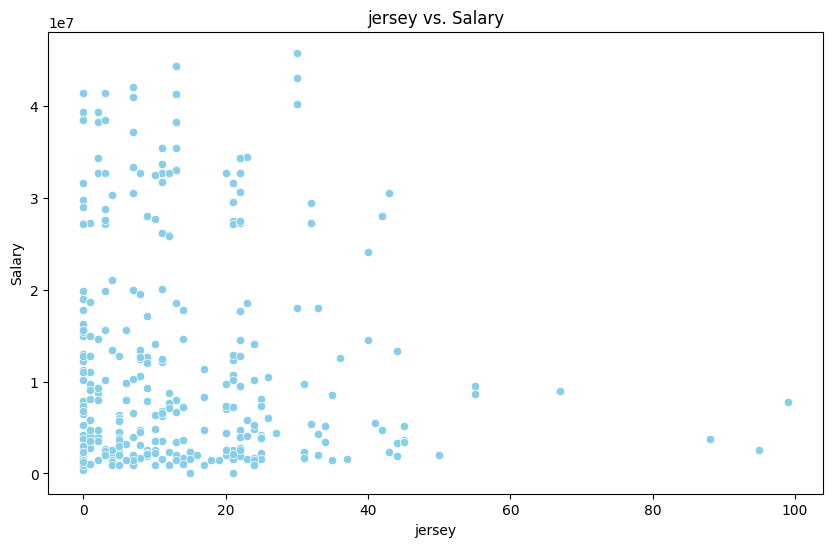

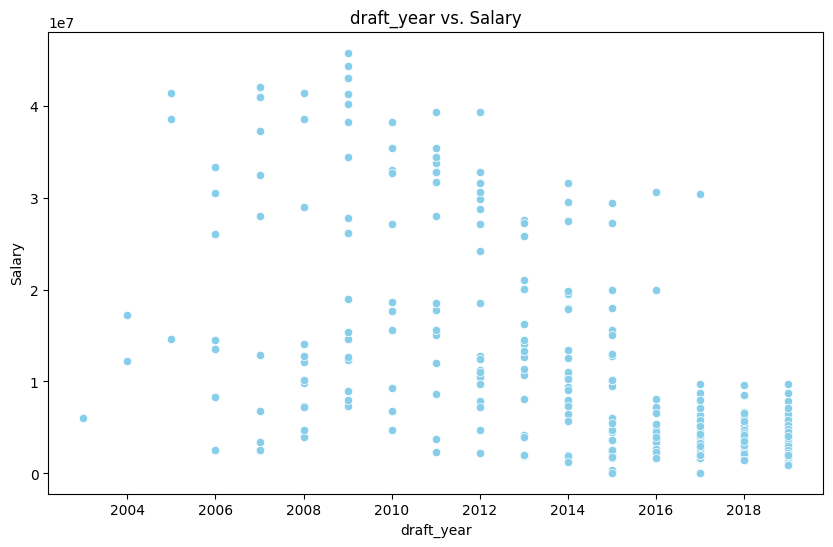

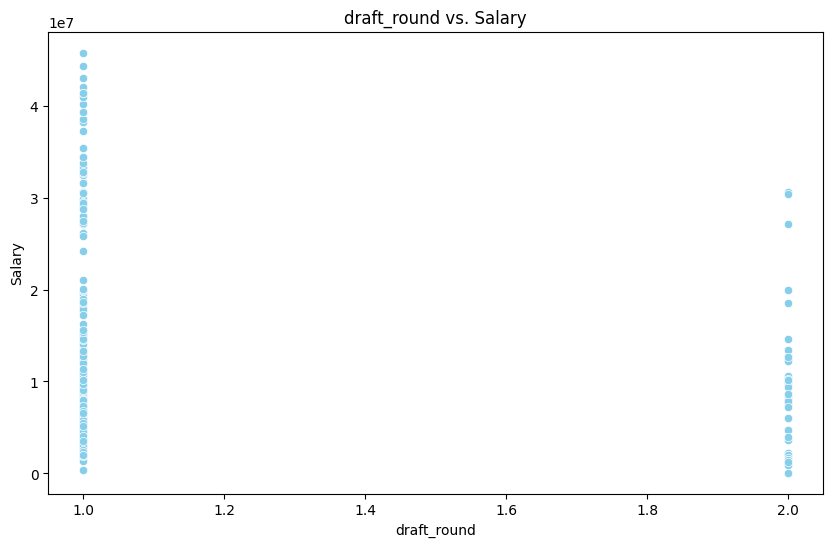

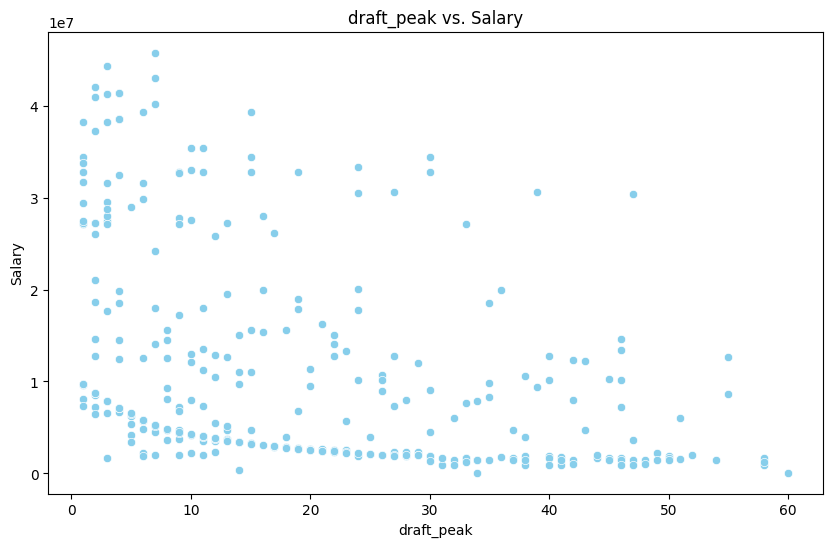

In [ ]:
numeric_columns = ['rating', 'jersey', 'draft_year', 'draft_round', 'draft_peak']
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[col], y=df['salary'], color='skyblue')
    plt.title(f'{col} vs. Salary')
    plt.xlabel(col)
    plt.ylabel('Salary')
    plt.show()

for categorical values

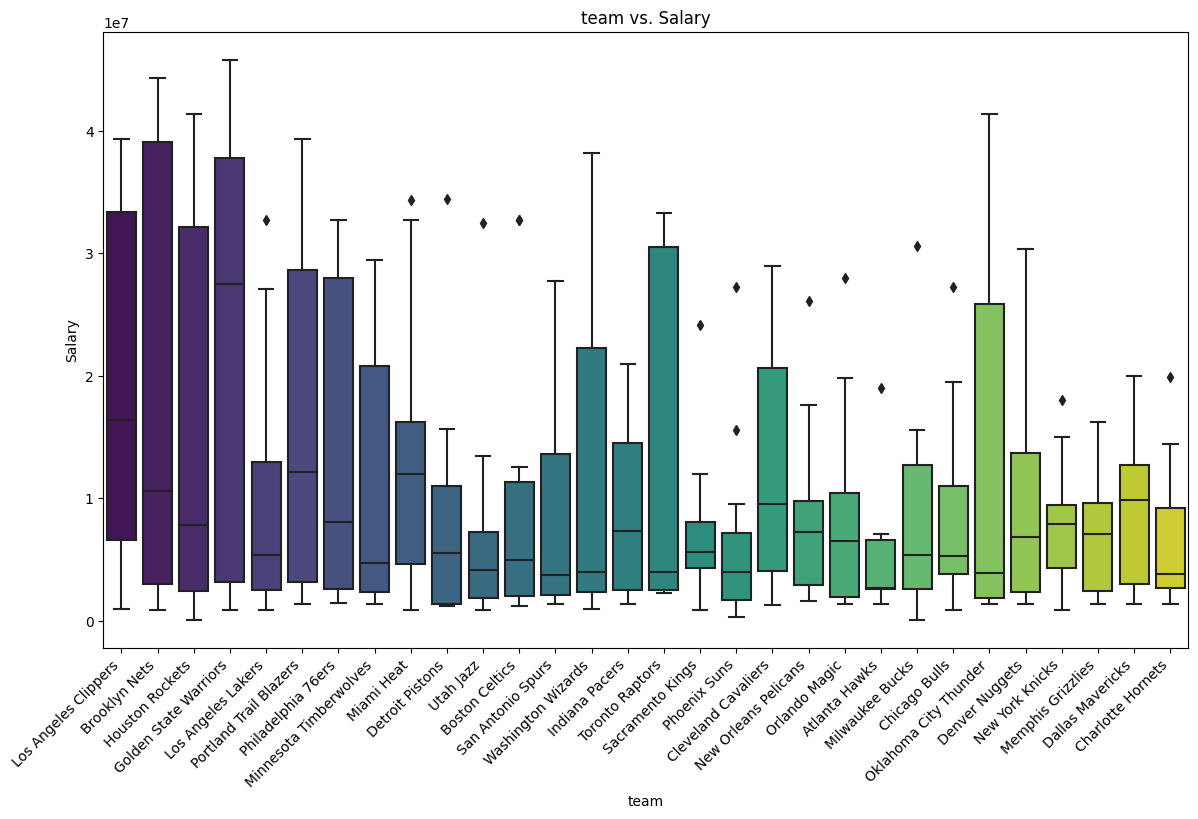

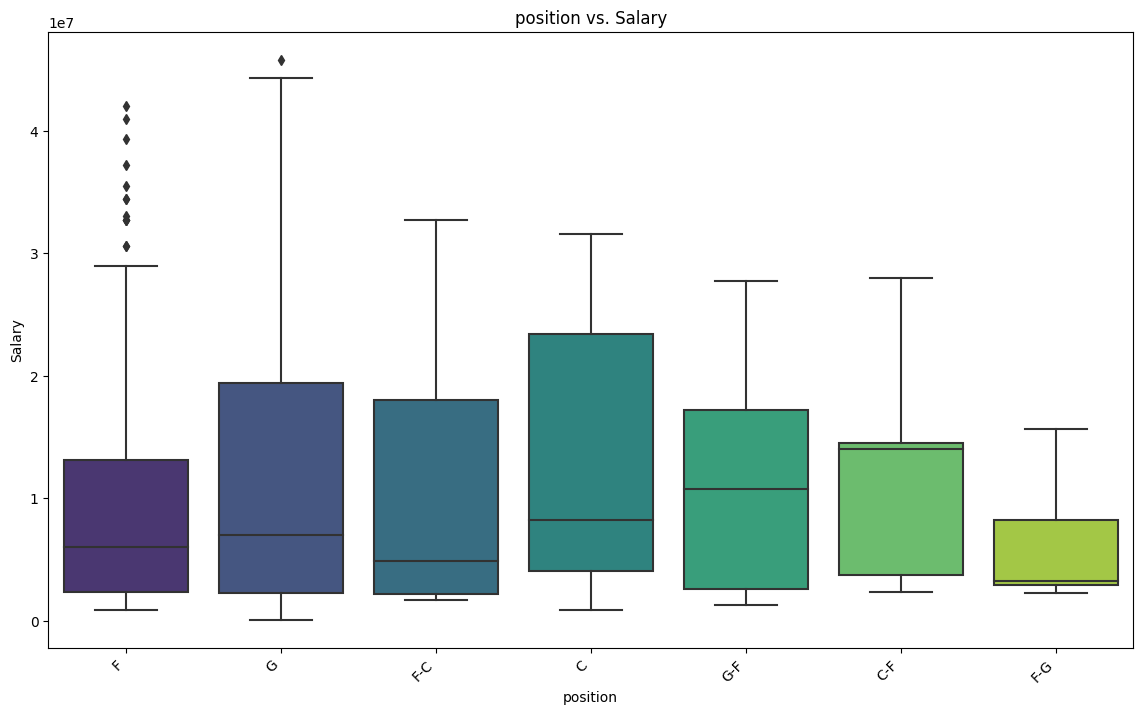

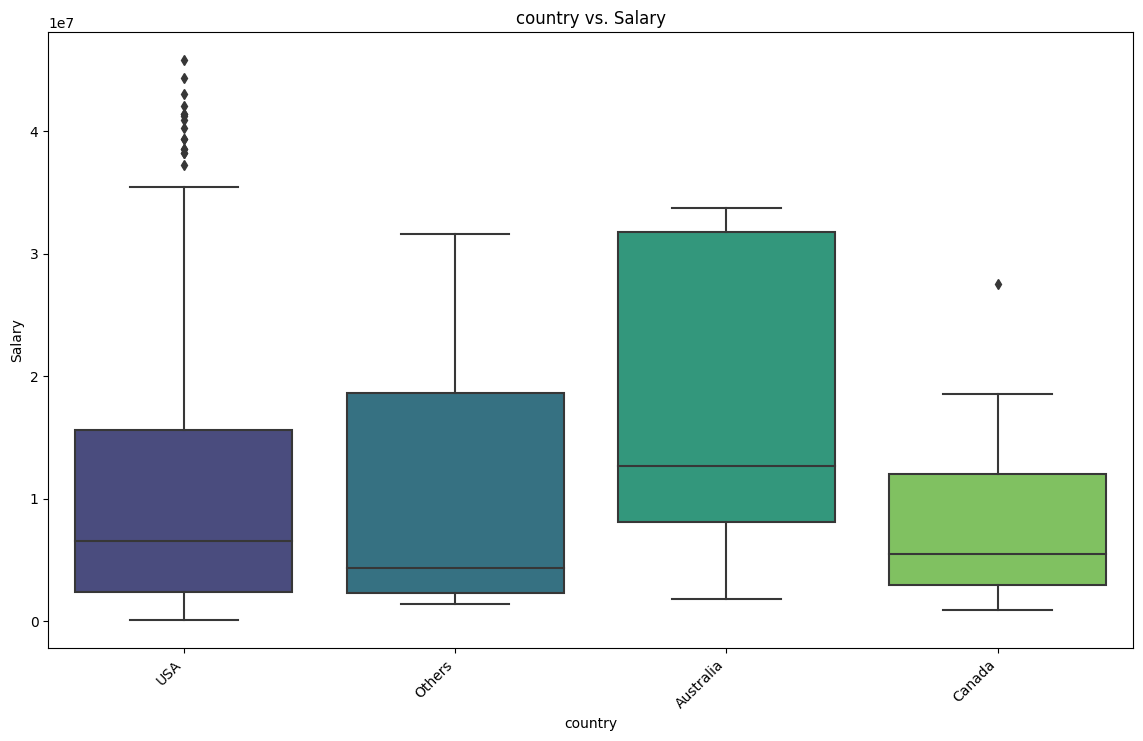

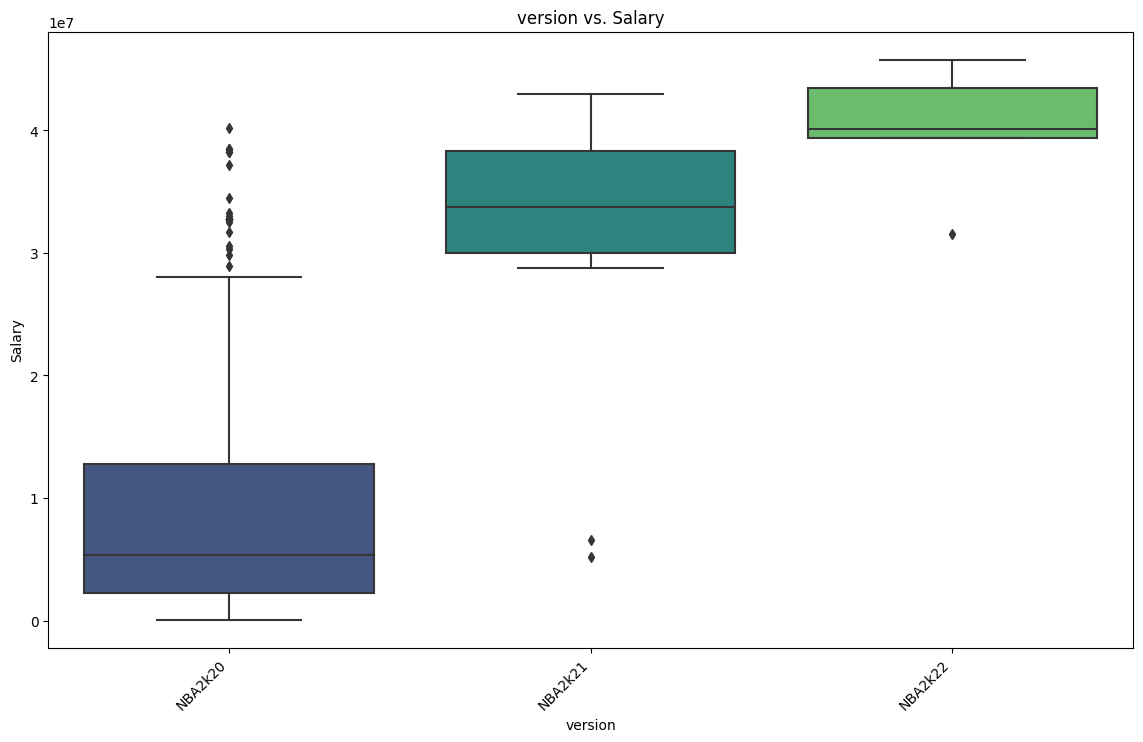

In [ ]:
for col in categorical_columns:
    plt.figure(figsize=(14, 8))
    sns.boxplot(x=col, y='salary', data=df, palette='viridis')
    plt.title(f'{col} vs. Salary')
    plt.xlabel(col)
    plt.ylabel('Salary')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [ ]:
df.corr()['salary']

<ipython-input-144-0b3491e11cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['salary']


rating         0.841127
jersey        -0.063984
salary         1.000000
draft_year    -0.598982
draft_round   -0.301309
draft_peak    -0.424745
Name: salary, dtype: float64

<ipython-input-145-845fade46a5c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap=custom_palette, linewidths=0.5, fmt=".2f", square=True)


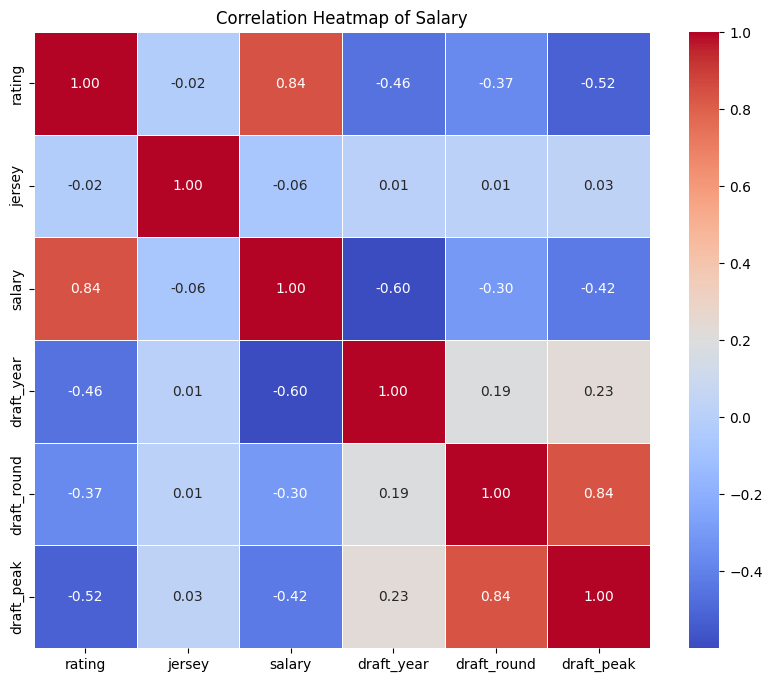

In [ ]:
custom_palette = sns.color_palette("coolwarm", as_cmap=True)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap=custom_palette, linewidths=0.5, fmt=".2f", square=True)
plt.title('Correlation Heatmap of Salary')
plt.show()

encoding categorical attributes

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['position'] = le.fit_transform(df['position'])
df['country'] = le.fit_transform(df['country'])
df['team'] = le.fit_transform(df['team'])

df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak,version
1,97,2,12,2,32742000,3,2011,1,15,NBA2k20
3,96,7,2,2,37199000,3,2007,1,2,NBA2k20
4,96,13,10,5,38199000,3,2009,1,3,NBA2k20
5,95,30,9,5,40231758,3,2009,1,7,NBA2k20
6,94,3,13,3,27093019,3,2012,1,1,NBA2k20


In [ ]:
df_encoded = pd.get_dummies(df, columns=['position', 'country', 'team', 'version'], drop_first=True)

df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak,version
1,97,2,12,2,32742000,3,2011,1,15,NBA2k20
3,96,7,2,2,37199000,3,2007,1,2,NBA2k20
4,96,13,10,5,38199000,3,2009,1,3,NBA2k20
5,95,30,9,5,40231758,3,2009,1,7,NBA2k20
6,94,3,13,3,27093019,3,2012,1,1,NBA2k20


In [ ]:
x = df.drop(['salary'], axis = 1)
y = df['salary']

In [ ]:
print(x)

     rating  jersey  team  position  country  draft_year  draft_round  \
1        97       2    12         2        3        2011            1   
3        96       7     2         2        3        2007            1   
4        96      13    10         5        3        2009            1   
5        95      30     9         5        3        2009            1   
6        94       3    13         3        3        2012            1   
..      ...     ...   ...       ...      ...         ...          ...   
457      88      43    27         2        2        2016            1   
458      88      45    28         5        3        2017            1   
459      88       3    20         5        3        2005            1   
460      88       3    29         5        3        2012            1   
462      87       7    27         5        3        2006            1   

     draft_peak  version  
1            15  NBA2k20  
3             2  NBA2k20  
4             3  NBA2k20  
5             7

In [ ]:
print(y)

1      32742000
3      37199000
4      38199000
5      40231758
6      27093019
         ...   
457    30559200
458     5195501
459    41358814
460    28751774
462    30500000
Name: salary, Length: 317, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['position'] = le.fit_transform(df['position'])
df['country'] = le.fit_transform(df['country'])
df['team'] = le.fit_transform(df['team'])
df['version'] = le.fit_transform(df['version'])

In [ ]:
df.head()

,rating,jersey,team,position,salary,country,draft_year,draft_round,draft_peak,version
1,97,2,12,2,32742000,3,2011,1,15,0
3,96,7,2,2,37199000,3,2007,1,2,0
4,96,13,10,5,38199000,3,2009,1,3,0
5,95,30,9,5,40231758,3,2009,1,7,0
6,94,3,13,3,27093019,3,2012,1,1,0


In [ ]:
x = df.drop(['salary'], axis = 1)
y = df['salary']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
diff = y_test - predictions

<ipython-input-156-e02a6c9f3d74>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diff)


<Axes: xlabel='salary', ylabel='Density'>

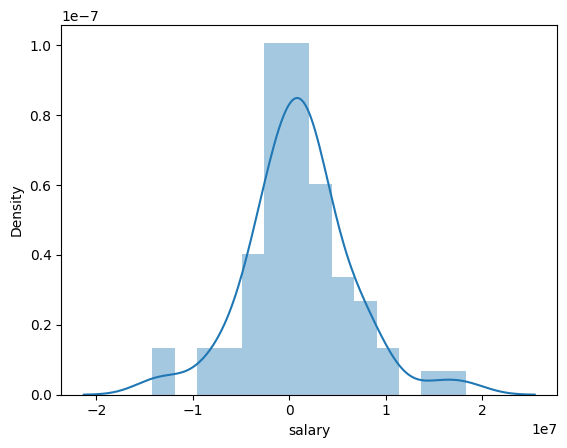

In [ ]:
import seaborn as sns
sns.distplot(diff)

In [ ]:
import pickle
pickle.dump(lr, open('lr.model', 'wb'))